In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# pipeline construction
from sklearn.pipeline import FeatureUnion, Pipeline 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# data processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# remove annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\Jakub\Desktop\GitHubProjects\hotel_booking_project\hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


I shufle the data as a good practice.

In [3]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,209,2016,May,19,5,1,3,2,...,No Deposit,240.0,NaN,0,Transient,46.98,0,2,Check-Out,2016-05-09
1,City Hotel,1,341,2015,September,39,23,0,2,2,...,Non Refund,1.0,NaN,0,Transient-Party,62.00,0,0,Canceled,2015-07-02
2,Resort Hotel,0,321,2017,June,23,5,2,5,2,...,No Deposit,240.0,NaN,0,Transient-Party,100.92,0,3,Check-Out,2017-06-12
3,City Hotel,0,45,2017,March,10,5,2,1,2,...,No Deposit,9.0,NaN,0,Transient,97.20,0,2,Check-Out,2017-03-08
4,City Hotel,1,145,2016,September,38,16,2,2,2,...,No Deposit,9.0,NaN,0,Transient,118.80,0,0,Canceled,2016-06-28


In [20]:
# split data into training and test set 
X_train, X_test, y_train, y_test = train_test_split(data.drop('is_canceled', axis=1), 
                                                    data['is_canceled'], 
                                                    test_size=0.2,
                                                    stratify=data['is_canceled'],
                                                    random_state=42)

# Basic Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.shape

(119390, 32)

We can see that there are some columns where some of the values are null, we will have to manage it later on during the processing stage.

In [7]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We can see that 37% of the entire is_canceled variable are "1". It is a little bit imbalanced but it should not be a huge problem in this case.

Now lets see the unique values per column:

In [8]:
for column in data:
    print(f'{column} - {len(data[column].unique())}')
    print(data[column].unique())
    print()

hotel - 2
['Resort Hotel' 'City Hotel']

is_canceled - 2
[0 1]

lead_time - 479
[209 341 321  45 145  39 296 188 203  15 149  94  55   0  72  41   2 155
 351 322   1 286   4   3  34 221 212 141 106  12 302  37  21  44  69  98
 183  13   8 379 307  73  40 531  77  82 211  61   6  11  91 274  10 146
 232  32  99  22 257  86  59  47 234 186 224  67 102 278 230  20 171 114
   7 195 304   5 130 320  78  89  28 277  29 383  33 133  51 150  43 109
 169 125 359  18  26 342 237 194 196 162 238  57  58  49 156  95 207 137
  63  76 103  80 173 281  24  30 178 219  36  93   9 267  92  75 524 215
 111 292 236  71  46 201  16 151 208 350 268 409 175 347 104  56 258  19
 276  83  14  17 283 159 248  27 115 352 213 168 264  62 249 165 124 206
  35 164  79  23 419  31 185 105  60 147  68 301  87 134 336 129 110 205
 191 297 158 309  54 187 128  90  88 199 287 118 131  53 240 323  74 349
 405  50 180  81 132 364 288 167 290 119 444 148  25 157 121 192 273 243
 135 101 177 226 222 262 272  84 184 198 181

Missing Values

In [9]:
a = data.isna().mean()*100
a[a>0]

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [10]:
a = data.isna().sum()
a[a>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

Distributions

In [11]:
numeric_columns = data.select_dtypes(include=np.number).columns
numeric_columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [12]:
non_numeric_columns = data.select_dtypes(exclude=np.number).columns
non_numeric_columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

Numeric Columns:

Column: is_canceled
Unique values: 2


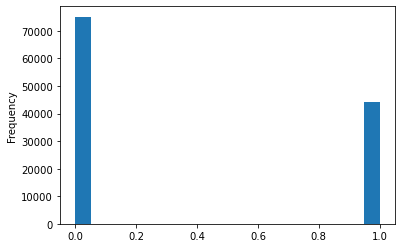

Column: lead_time
Unique values: 479


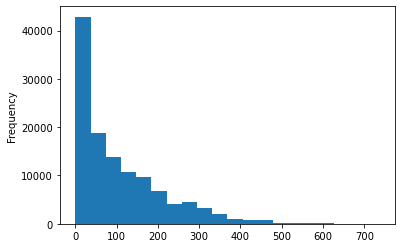

Column: arrival_date_year
Unique values: 3


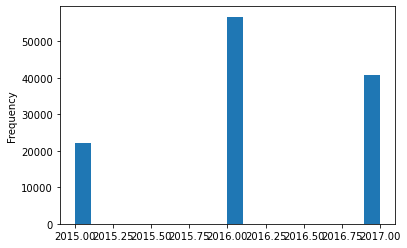

Column: arrival_date_week_number
Unique values: 53


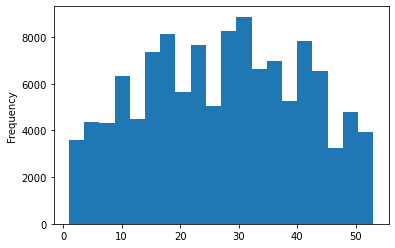

Column: arrival_date_day_of_month
Unique values: 31


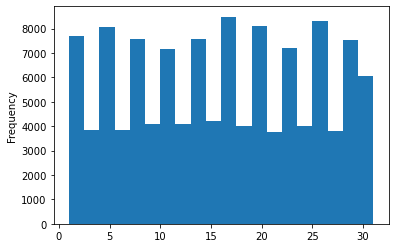

Column: stays_in_weekend_nights
Unique values: 17


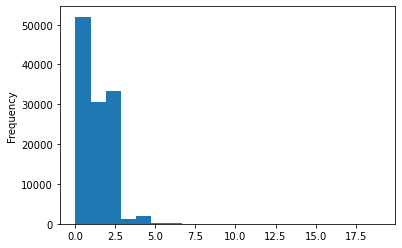

Column: stays_in_week_nights
Unique values: 35


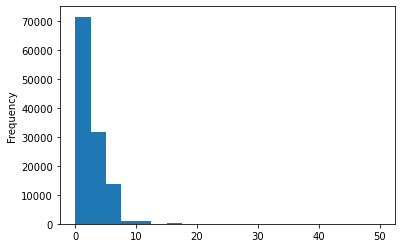

Column: adults
Unique values: 14


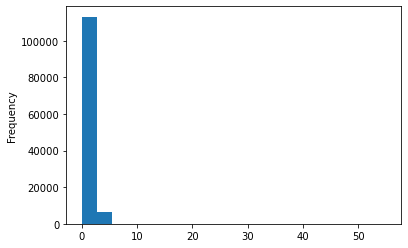

Column: children
Unique values: 6


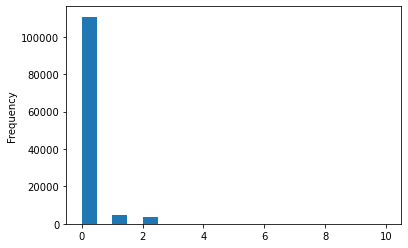

Column: babies
Unique values: 5


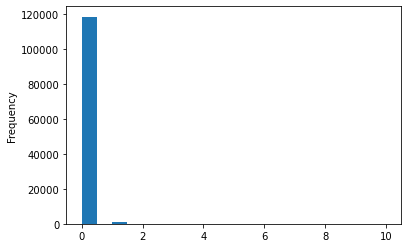

Column: is_repeated_guest
Unique values: 2


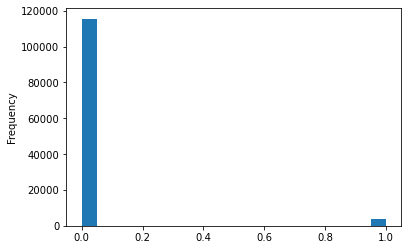

Column: previous_cancellations
Unique values: 15


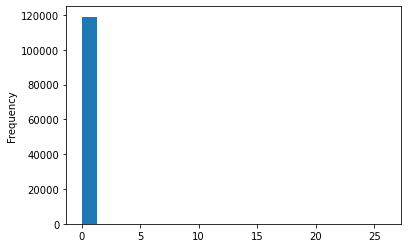

Column: previous_bookings_not_canceled
Unique values: 73


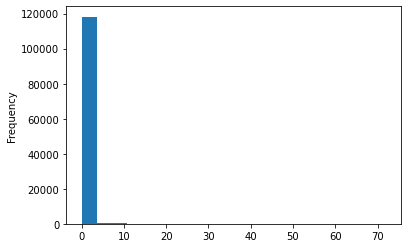

Column: booking_changes
Unique values: 21


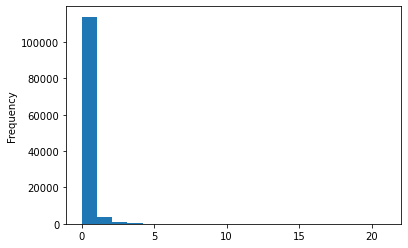

Column: agent
Unique values: 334


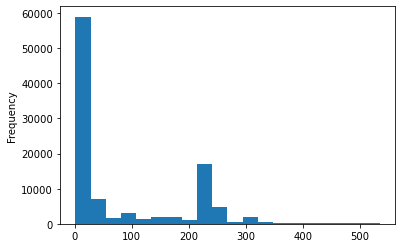

Column: company
Unique values: 353


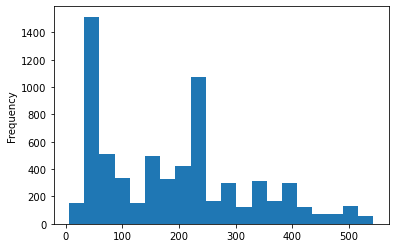

Column: days_in_waiting_list
Unique values: 128


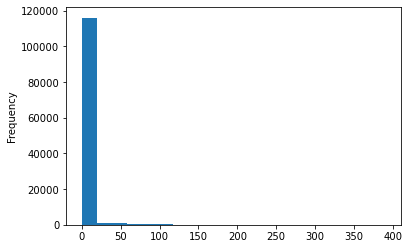

Column: adr
Unique values: 8879


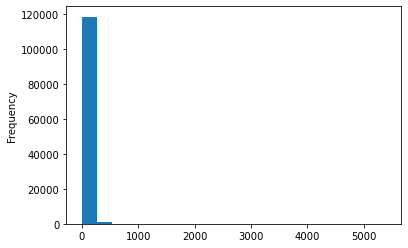

Column: required_car_parking_spaces
Unique values: 5


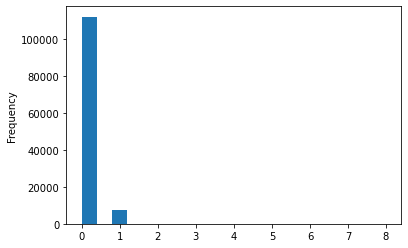

Column: total_of_special_requests
Unique values: 6


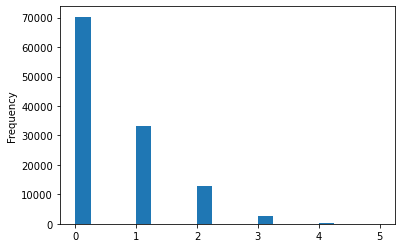

In [13]:
for column in numeric_columns:
    print(f'Column: {column}')
    print(f'Unique values: {len(data[column].unique())}')
    data[column].plot.hist(bins=20)
    plt.show()

Categorical Columns:

Columns: hotel
Unique values: 2


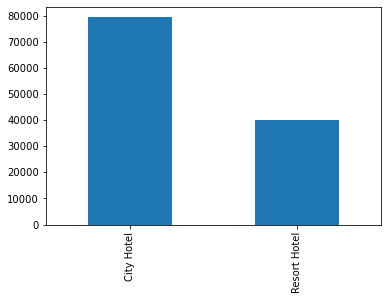

Columns: arrival_date_month
Unique values: 12


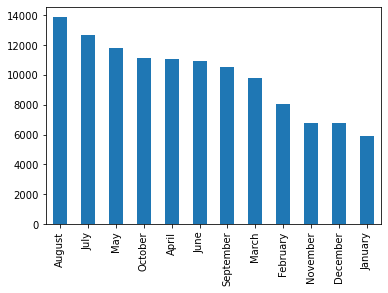

Columns: meal
Unique values: 5


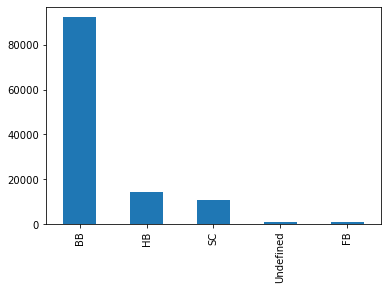

Columns: country
Unique values: 178


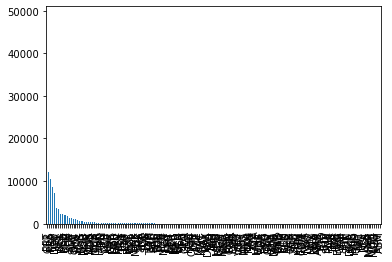

Columns: market_segment
Unique values: 8


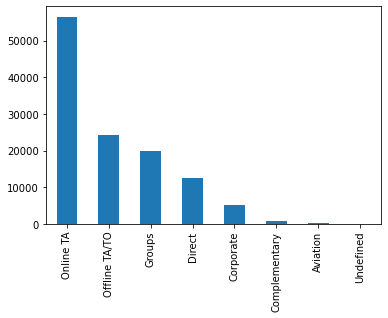

Columns: distribution_channel
Unique values: 5


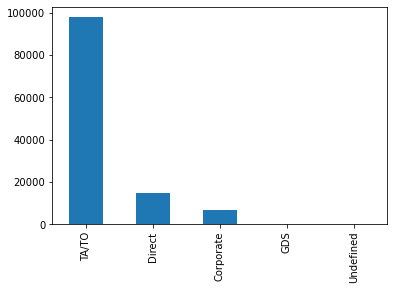

Columns: reserved_room_type
Unique values: 10


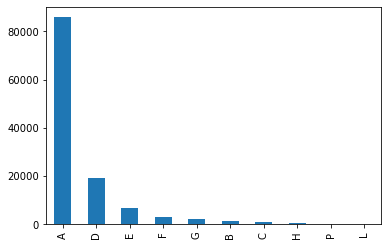

Columns: assigned_room_type
Unique values: 12


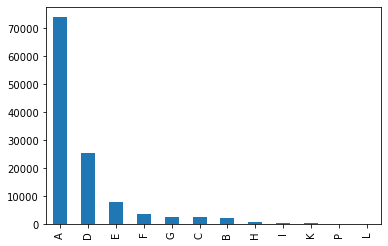

Columns: deposit_type
Unique values: 3


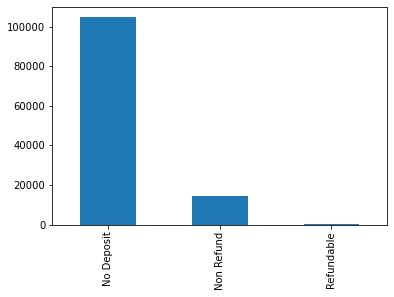

Columns: customer_type
Unique values: 4


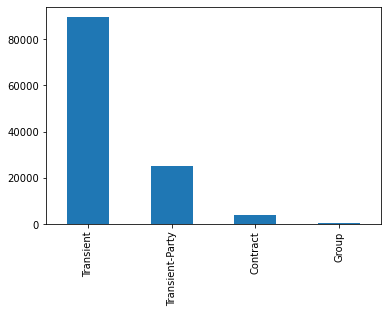

Columns: reservation_status
Unique values: 3


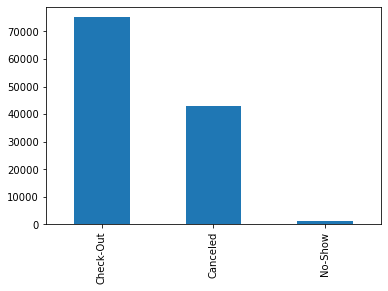

Columns: reservation_status_date
Unique values: 926


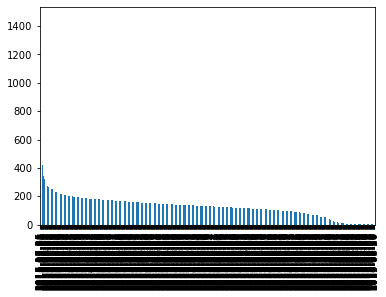

In [14]:
for column in non_numeric_columns:
    print(f'Columns: {column}')
    print(f'Unique values: {len(data[column].unique())}')
    data[column].value_counts().plot.bar()
    plt.show()

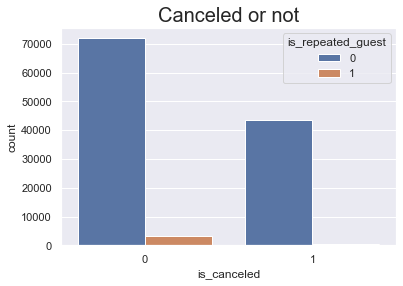

In [21]:
sns.set(style = "darkgrid")
plt.title("Canceled or not", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = data)

From the graph above we can assume that repeated guests do not cancel their reservations. The data looks logic.

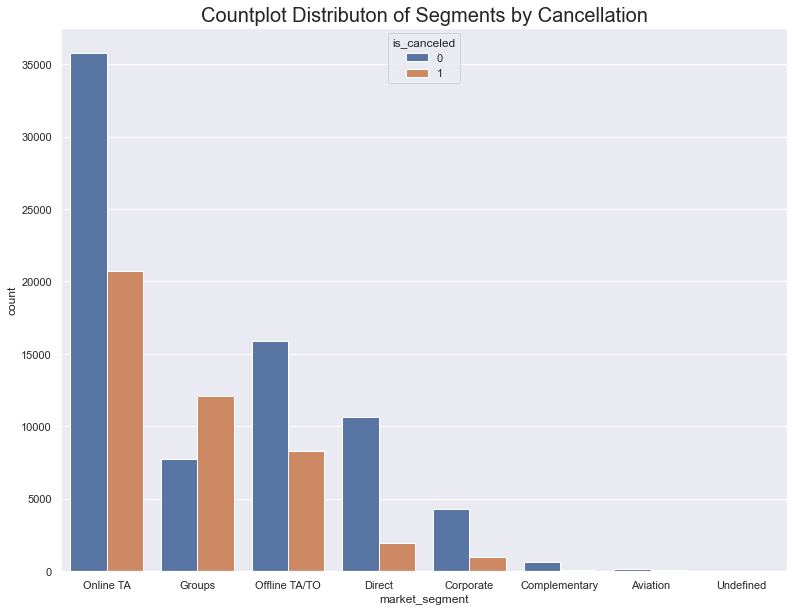

In [22]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = data)

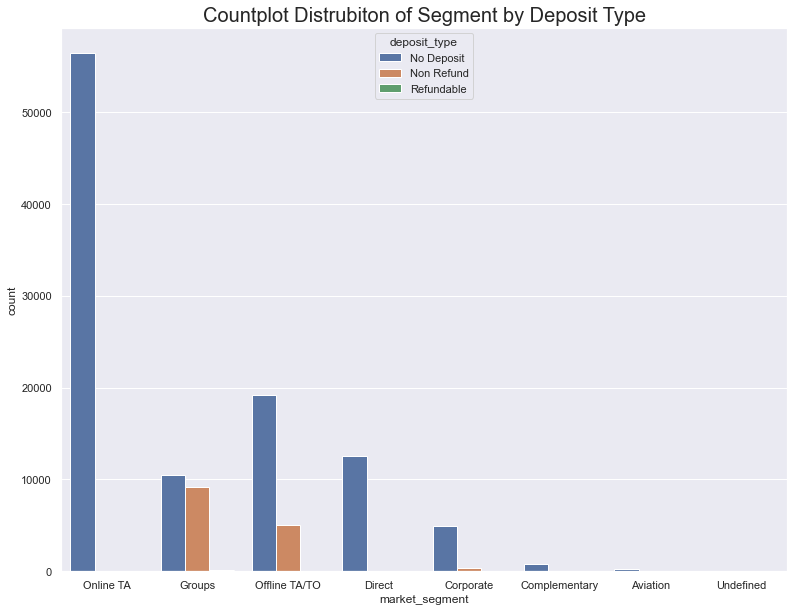

In [23]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = data)

- When we look at Distribution of Segment by Deposit Type graph it is clear that Group reservations are often made with Non Refund Deposit - which is quite obvious because group reservations are much bigger than individual guests and they require reservation of many rooms. When the group cancels the reservation, hotel will not be easily able to fill the empty rooms.
- I guess that case with Offline TA/TO is similar. Travel Agents probably reserve many rooms at the same time so they may be treated same as groups - these are only my assumption, I am not sure of this case.

In [40]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
         'November', 'December']

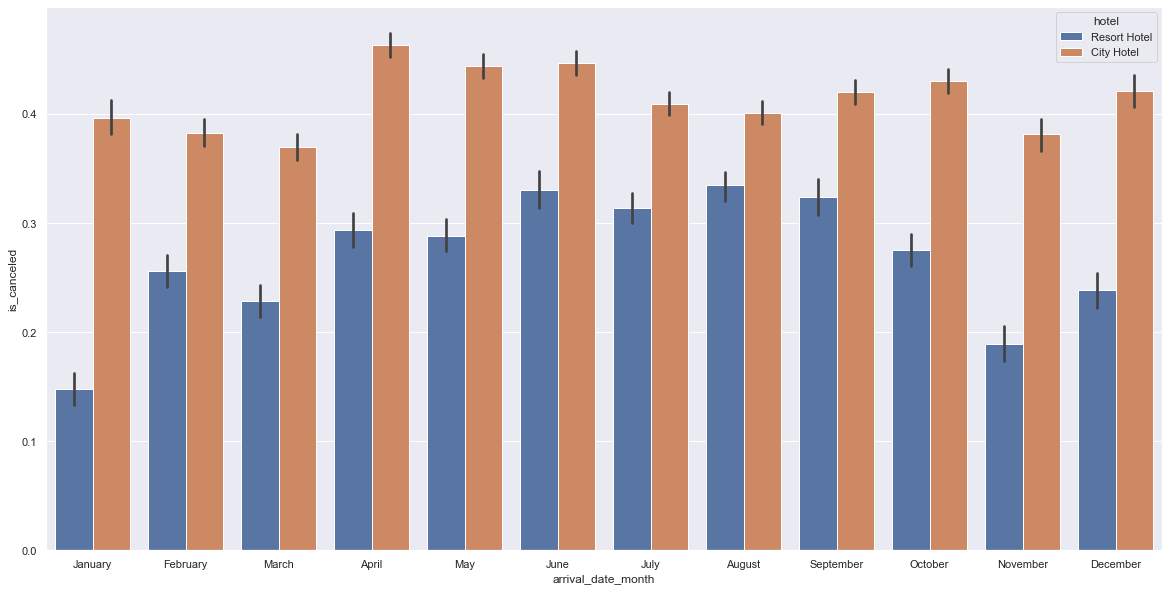

In [41]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = data, order = months);

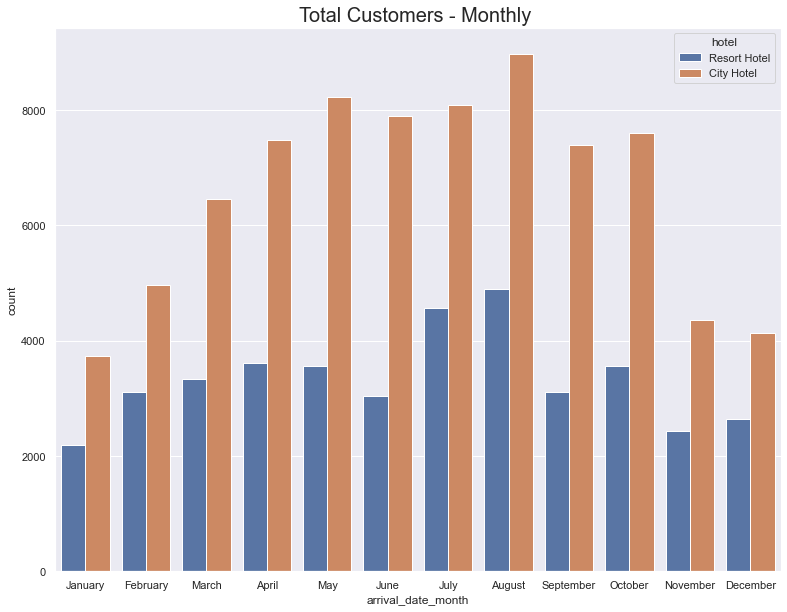

In [43]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data, order = months)

We can clearly see that during winter time there is a lot less guests in both hotels. The cancelation rate is lower in that period of time as well in Resort Hotel. In City Hotel the cancelation rate is generally on the constant level for the entire year.

# Feature Engineering

Conclusions:
- Numeric columns are skewed. For linear algorithms it can be a problem. Log or Yeo-Jonson transformation may help.

Categorical columns:
- City and Resort hotel: change for binary
- Arrival date month: one hot encoding (?) - not sure yet
- Meal: BB + others
- Country: Group the countries
- Market_segment: Online TA, Offline TA/TO, Groups, Others
- Distribution_channel: TA/TO, Others
- Reserved_room_type: A, Others
- Assigned_room_type: A, D, Others
- deposit_type: No Deposit, Non Refund Deposit, Refundable
- Customer_type: Transient, Others
- Reservation_status: CHeck-out, Canceled, No-show
- reservation_status_date: Remove(?)

Numeric columns:
- Company: Remove, too many missing values
- Agent: fill with mode
- Children: drop duplicates
- Country: drop duplicates

In [56]:
df = data.copy()

In [47]:
# I want to remove "company" and "reservation_status_date"

class RemoveColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_remove: list):
        self.columns_to_remove = columns_to_remove
    
    # even if nothing to fit, this method must return self
    def fit(self, X, y = None ):
        return self 
    
    def transform(self, X, y = None ):
        return X.drop(self.columns_to_remove, axis=1)

In [48]:
class HotelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X['hotel'] = X['hotel'].apply(lambda x: 0 if x=='Resort Hotel' else 1)
        return X

In [49]:
class Market_segment_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        categories = ['Online TA', 'Offline TA/TO', 'Groups', 'Direct']
        X['market_segment'] = X['market_segment'].apply(lambda x: "Other" if x not in categories else x)
        return X

In [50]:
class ChannelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X['distribution_channel'] = X['distribution_channel'].apply(lambda x: 1 if x=='TA/TO' else 0)
        return X

In [51]:
class ReservedTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X['reserved_room_type'] = X['reserved_room_type'].apply(lambda x: 1 if x=='A' else 0)
        return X

In [52]:
class AssignedTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        categories = ['A', 'D']
        X['assigned_room_type'] = X['assigned_room_type'].apply(lambda x: "Other" if x not in categories else x)
        return X

In [53]:
class CustomerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X['customer_type'] = X['customer_type'].apply(lambda x: 1 if x=='Transient' else 0)
        return X

In [59]:
# check if all the transformers work

steps = [
    ('remove', RemoveColumnsTransformer(columns_to_remove=['company', 'reservation_status_date'])),         
    ('hotel', HotelTransformer()), 
    ('market_segment', Market_segment_Transformer()),
    ('channel', ChannelTransformer()), 
    ('reserved', ReservedTransformer()),
    ('assigned', AssignedTransformer()), 
    ('customer', CustomerTransformer()), 
]

pipeline = Pipeline(steps=steps)
pipeline.fit_transform(df).head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,0,209,2016,May,19,5,1,3,2,...,A,0,No Deposit,240.0,0,1,46.98,0,2,Check-Out
1,1,1,341,2015,September,39,23,0,2,2,...,A,0,Non Refund,1.0,0,0,62.00,0,0,Canceled
2,0,0,321,2017,June,23,5,2,5,2,...,A,3,No Deposit,240.0,0,0,100.92,0,3,Check-Out
3,1,0,45,2017,March,10,5,2,1,2,...,A,0,No Deposit,9.0,0,1,97.20,0,2,Check-Out
4,1,1,145,2016,September,38,16,2,2,2,...,A,0,No Deposit,9.0,0,1,118.80,0,0,Canceled
5,1,0,39,2015,August,33,14,0,2,2,...,A,0,No Deposit,6.0,0,0,109.00,0,0,Check-Out
6,1,1,296,2017,April,14,3,1,5,3,...,D,0,No Deposit,9.0,0,1,193.50,0,0,Canceled
7,0,1,188,2016,September,37,5,1,5,1,...,Other,0,No Deposit,250.0,0,1,150.60,0,0,Canceled
8,0,0,203,2016,May,20,10,0,2,2,...,A,0,No Deposit,248.0,0,0,46.00,0,0,Check-Out
9,1,0,15,2016,January,4,22,0,2,2,...,A,0,No Deposit,9.0,0,1,80.30,0,1,Check-Out
